The mean of the sample means is 74.52011999999999


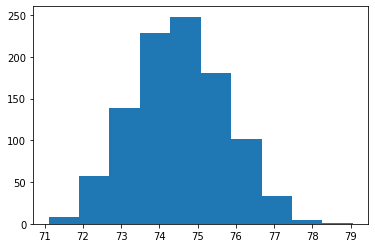

In [17]:
#Central limit theorem
from numpy.random import seed
from numpy.random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seed(2)
means = [np.mean(randint(60,90,50)) for i in range(1000)]
plt.hist(means)
print('The mean of the sample means is {}'.format(np.mean(means)))

In [22]:
#Normality test for CLT
#Shapiro-Wilk
from scipy.stats import shapiro
stats, p = shapiro(means)
print('Statistics={}, p-value={}'.format(stats,p))
alpha =0.05
if(p > alpha):
    print("Fail to reject H0")

Statistics=0.997937798500061, p-value=0.25756120681762695
Fail to reject H0


In [27]:
#1 sample t-test
from scipy import stats
m = np.mean(means)
print("Mean", m)
tset, p = stats.ttest_1samp(means, 74)
print(tset, p)

Mean 74.52011999999999
13.663418569662646 4.322482647170606e-39


In [ ]:
#stats.ttest_rel() -> parired sample t-test
#stats.ttest_ind() -> independent sampled t-test

In [29]:
from statsmodels.stats import weightstats as stests
#stests.ztest(x1, x2=None, value=156) -> 1 sampled z-test
#stests.ztest(x1, x2, value=0, alternative='two-sided') -> independent sample z-test

In [ ]:
#chi square test for feature independence
from sklearn.feature_selection import chi2
chi_scores  = chi2(x_train, y_train)
chi_table = pd.DataFrame(x_train.columns)
chi_table['Chi Score'] = chi_scores[0]
chi_table['p-value'] = chi_scores[1]
print(chi_table)

In [ ]:
#Anova